## Import Neccesary Libraries for Data import and Manipulation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
training_path= r"C:\Users\Hakim.Ibrahim.AIRTELTIGO\Downloads\churn-bigml-80.csv"
testing_path = r"C:\Users\Hakim.Ibrahim.AIRTELTIGO\Downloads\churn-bigml-20.csv"
training_df = pd.read_csv(training_path)
testing_df = pd.read_csv(testing_path)
training_df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
training_df["Area code"]  = training_df["Area code"].astype('str')
testing_df["Area code"]  = testing_df["Area code"].astype('str')

In [5]:
training_df.describe().round(2)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00
mean,100.62,8.02,179.48,100.31,30.51,200.39,100.02,17.03,201.17,100.11,9.05,10.24,4.47,2.76,1.56
std,39.56,13.61,54.21,19.99,9.22,50.95,20.16,4.33,50.78,19.42,2.29,2.79,2.46,0.75,1.31
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.70,33.00,1.97,0.00,0.00,0.00,0.00
25%,73.00,0.00,143.40,87.00,24.38,165.30,87.00,14.05,166.92,87.00,7.51,8.50,3.00,2.30,1.00
50%,100.00,0.00,179.95,101.00,30.59,200.90,100.00,17.08,201.15,100.00,9.05,10.20,4.00,2.75,1.00
75%,127.00,19.00,215.90,114.00,36.70,235.10,114.00,19.98,236.48,113.00,10.64,12.10,6.00,3.27,2.00
max,243.00,50.00,350.80,160.00,59.64,363.70,170.00,30.91,395.00,166.00,17.77,20.00,20.00,5.40,9.00


In [6]:
training_df.describe(include = ['object','bool'])

,State,Area code,International plan,Voice mail plan,Churn
count,2666,2666,2666,2666,2666
unique,51,3,2,2,2
top,WV,415,No,No,False
freq,88,1318,2396,1933,2278


In [7]:
testing_df.describe(include = ['object','bool'])

,State,Area code,International plan,Voice mail plan,Churn
count,667,667,667,667,667
unique,51,3,2,2,2
top,AZ,415,No,No,False
freq,19,337,614,478,572


In [8]:
training_dummy = pd.get_dummies(training_df[['International plan','Voice mail plan']], drop_first=True,dtype='int')
testing_dummy = pd.get_dummies(testing_df[['International plan','Voice mail plan']], drop_first=True,dtype='int')
training_dummy.head()

,International plan_Yes,Voice mail plan_Yes
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


In [9]:
training_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [10]:
training_df = pd.concat([training_df.drop(columns=['State','Area code','International plan','Voice mail plan'], axis = 1),training_dummy], axis = 1)
testing_df = pd.concat([testing_df.drop(columns=['State','Area code','International plan','Voice mail plan'], axis = 1),testing_dummy], axis = 1)
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Number vmail messages   2666 non-null   int64  
 2   Total day minutes       2666 non-null   float64
 3   Total day calls         2666 non-null   int64  
 4   Total day charge        2666 non-null   float64
 5   Total eve minutes       2666 non-null   float64
 6   Total eve calls         2666 non-null   int64  
 7   Total eve charge        2666 non-null   float64
 8   Total night minutes     2666 non-null   float64
 9   Total night calls       2666 non-null   int64  
 10  Total night charge      2666 non-null   float64
 11  Total intl minutes      2666 non-null   float64
 12  Total intl calls        2666 non-null   int64  
 13  Total intl charge       2666 non-null   float64
 14  Customer service calls  2666 non-null   

## Model Building And Selection

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline, make_pipeline

In [12]:
X_train = training_df.drop('Churn', axis = 1)
X_train_scaled = StandardScaler().fit_transform(X_train.values)
y_train = training_df['Churn'].astype('int').values
X_test = testing_df.drop('Churn', axis = 1)
X_test_scaled = StandardScaler().fit_transform(X_test.values)
y_test = testing_df['Churn'].astype('int').values
print(X_train_scaled[0:5, :])

[[ 0.69216332  1.24750838  1.57966959  0.48486775  1.57994234 -0.05861885
  -0.05078123 -0.05844549  0.85740344 -0.46903104  0.85670695 -0.0850203
  -0.59752673 -0.08568137 -0.42917241 -0.33569005  1.62391742]
 [ 0.16127783  1.32098526 -0.32991809  1.13537472 -0.3301935  -0.0959162
   0.14765447 -0.09539655  1.04845815  0.14905361  1.04929318  1.24217895
  -0.59752673  1.24292063 -0.42917241 -0.33569005  1.62391742]
 [ 0.91968567 -0.58941354  1.17930193  0.68502374  1.179465   -1.55443885
   0.49491694 -1.55496337 -0.75966782  0.20056066 -0.75839118  0.7041252
   0.21689365  0.69819381 -1.19195484 -0.33569005 -0.61579486]
 [-0.42016819 -0.58941354  2.21250879 -1.46665316  2.21267484 -2.71850874
  -0.59647939 -2.71892171 -0.08408263 -0.57204515 -0.08433938 -1.30460879
   1.03131404 -1.30799521  0.33361002  2.97893841 -0.61579486]
 [-0.64769054 -0.58941354 -0.23582246  0.63498474 -0.23577201 -1.02246087
   1.09022403 -1.02148246 -0.28104624  1.07618059 -0.28130257 -0.04915005
  -0.597526

In [13]:
models = {
            "LogisticRegression" : LogisticRegression(class_weight='balanced'),
            "RandomForest": RandomForestClassifier(class_weight='balanced'),
            "MLPClassifier": MLPClassifier(max_iter=1000, )

}


In [14]:
results = {
"accuracy" : [],
"precision" : [],
"sensitivity" : [],
"f1_score" :[]}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results["accuracy"].append(accuracy_score(y_test, y_pred))
    results["precision"].append(precision_score(y_test, y_pred))
    results["sensitivity"].append(recall_score(y_test,y_pred))
    results["f1_score"].append(f1_score(y_test,y_pred))
print(results)

{'accuracy': [0.7766116941529235, 0.9625187406296851, 0.9205397301349325], 'precision': [0.36363636363636365, 0.9861111111111112, 0.7386363636363636], 'sensitivity': [0.7578947368421053, 0.7473684210526316, 0.6842105263157895], 'f1_score': [0.49146757679180886, 0.8502994011976048, 0.7103825136612022]}


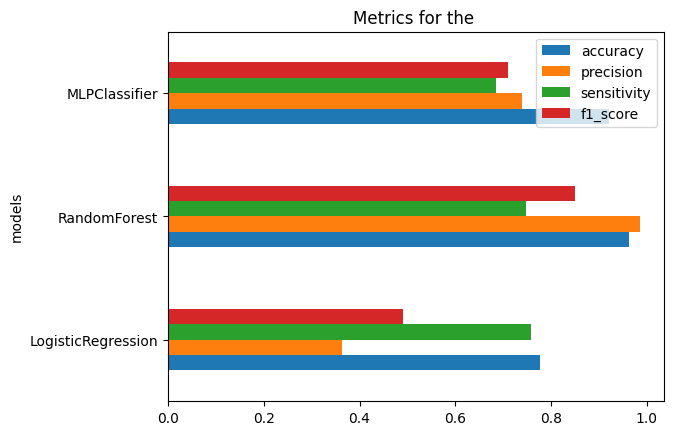

In [15]:
result_df = pd.DataFrame(results)
result_df["models"] = ["LogisticRegression","RandomForest", "MLPClassifier"]
result_df.set_index("models",inplace=True)
result_df.plot(kind = 'barh')
#plt.xticks(rotation = )
plt.title('Metrics for the ')
plt.show()

### Model Selection
Though RandomForest model is more accurate,  logisticRegression is able to catch churners better since it has the highest sensitivity.
So I will pick Random Forest model and change the prediction weight in order to improve the sensitivity.

In [16]:
pipeline = [
                  ('Scaler', StandardScaler()),
                  ('rf_model',RandomForestClassifier(class_weight='balanced'))]
model_pipeline = Pipeline(pipeline)
model_pipeline.fit(X_train, y_train)
y_prob = model_pipeline.predict_proba(X_test)[:,1]
y_pred = (y_prob>0.4).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.93      0.80      0.86        95

    accuracy                           0.96       667
   macro avg       0.95      0.89      0.92       667
weighted avg       0.96      0.96      0.96       667



### Result
A Change in prediction weight for churn (1) improved the sensitivity of the positive class from 0.73 to 0.81.
increasing the models ability to catch churners

[[566   6]
 [ 19  76]]


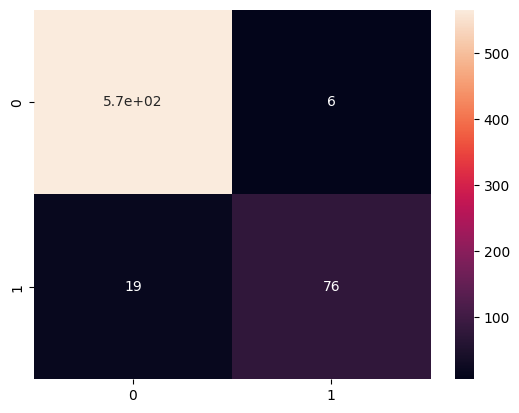

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred,labels =[0,1]).round(1)
print(conf_matrix)
sns.heatmap(conf_matrix, annot= True)
plt.show()

# Model Explainabilty

In [18]:
import shap
import lime

[0.0352437  0.02510062 0.13674841 0.03603853 0.12194544]


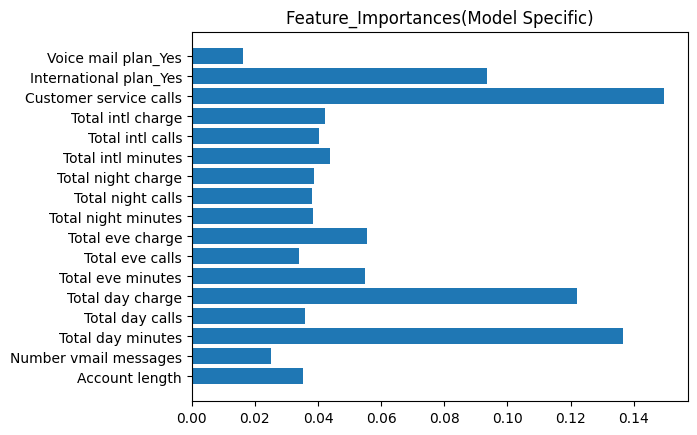

In [19]:
feature_importances = model_pipeline.named_steps['rf_model'].feature_importances_
print(feature_importances[0:5])
cols = list(training_df.columns)
cols.remove('Churn')
plt.barh(cols, feature_importances)
#plt.yticks(rotation = 60)
plt.title(r'Feature_Importances(Model Specific)')
plt.show()

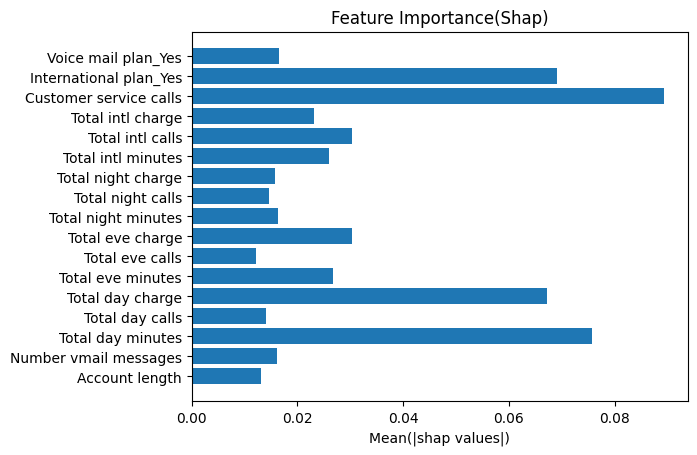

In [20]:
explainer = shap.TreeExplainer(model_pipeline.named_steps['rf_model'])
shap_vals = explainer.shap_values(X_train_scaled)
means_vals = np.abs(shap_vals[:,:,1]).mean(axis = 0)
means_vals
plt.title(r'Feature Importance(Shap)')
plt.xlabel('Mean(|shap values|)')
plt.barh(cols, means_vals)
plt.show()

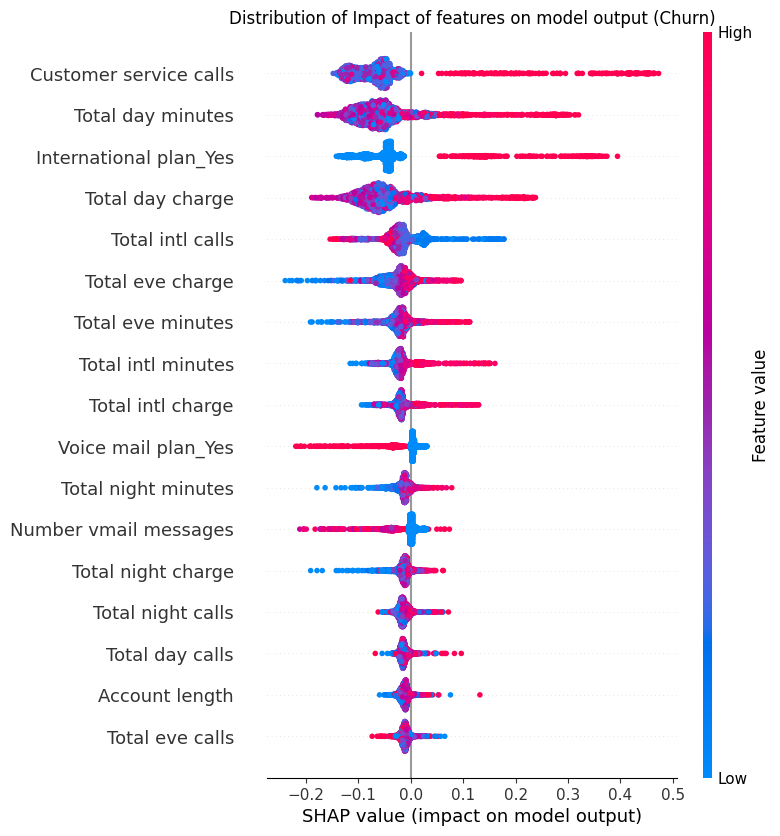

In [21]:
explainer = shap.TreeExplainer(model_pipeline.named_steps['rf_model'])
shap_vals = explainer.shap_values(X_train_scaled)
shap.summary_plot(shap_vals[:,:,1], X_train_scaled,plot_type="dot", feature_names= X_train.columns, show=False)
plt.title('Distribution of Impact of features on model output (Churn)')
plt.show()

## Comments On Feature Importances & Possible Churn Drivers.

### Churn Drivers
The most important feature which contributes to models prediction of a churn are;
* Number of customer service calls.
* Whether a customer is sign up on an international call plan.
* Total day voice usage/charge.<br>

All this features are envident using the model specific and agnostic method like SHAP.

To better understand how this features impact churn, the beeswarm plot shows that;
* Higher customer service calls contribute to churn (categorically calls > 2). Which might indicate either low customer satisfaction or unresolved issues.
* Customers on international plan tend to churn more. which indicate how price-sensitive this customers maybe due to higher charges on international calls leading to bill shocks.
* Higher day usages/charges (Voice). Higher consumers are susceptible to churn since they tend to scout for cheaper offers in the market.

### Solutions.
* Prioritize Customers with higher service calls (calls >2) to attend their issues (billing dispute, networt/SIM issues etc.).
* Solve Pain point of customers on international plan by reviewing international plan pricing, offering discounted offers, and investigating customer complaint.
* Realign product offers for higher users (product personalization) and providing real-time alert on usage to prevent bill shocks.

In [22]:
np.where(y_test == 1)

(array([  1,   2,   7,  14,  16,  35,  41,  47,  52,  56,  58,  60,  61,
         62,  65,  74,  96,  98, 100, 109, 110, 114, 115, 123, 132, 134,
        154, 155, 163, 170, 175, 179, 201, 203, 225, 226, 238, 252, 276,
        279, 282, 287, 298, 299, 327, 337, 342, 349, 351, 355, 362, 385,
        386, 387, 390, 398, 401, 403, 409, 420, 424, 430, 437, 442, 455,
        457, 458, 461, 463, 464, 477, 483, 494, 495, 500, 505, 524, 525,
        529, 540, 542, 546, 549, 552, 561, 572, 573, 582, 590, 593, 606,
        615, 652, 653, 661]),)

In [23]:
X_test[(X_test['Customer service calls'] > 2)].index

Index([  1,   2,   6,   7,   9,  31,  41,  43,  46,  51,
       ...
       610, 615, 618, 619, 623, 641, 647, 651, 656, 664],
      dtype='int64', length=138)

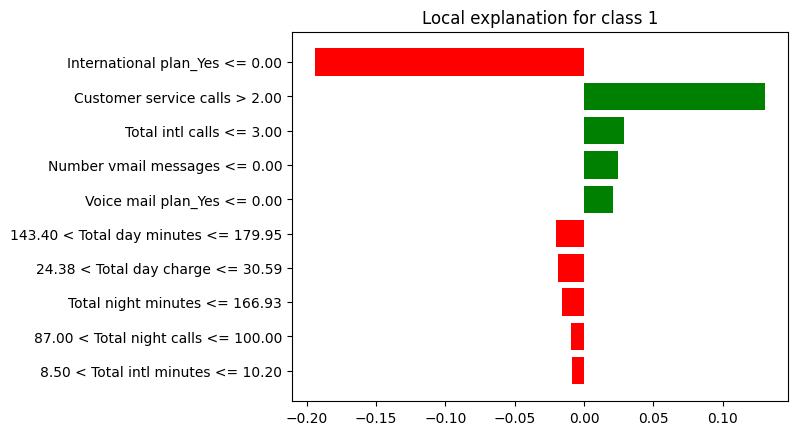

In [24]:
from lime.lime_tabular import LimeTabularExplainer
instance = X_test.iloc[7,:]
explainer = LimeTabularExplainer(
                                  X_train.values,
                                  feature_names= X_train.columns,
                                  mode = 'classification'
)

explained_class = explainer.explain_instance(instance.values,
                                             model_pipeline.predict_proba
                                             )
explained_class.as_pyplot_figure();

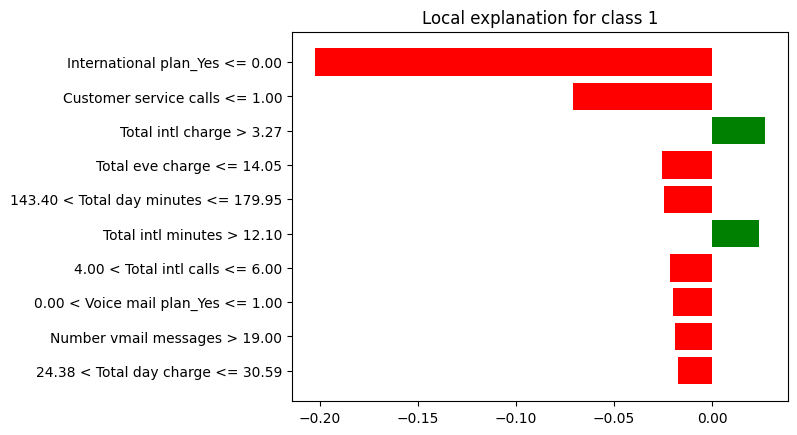

In [25]:
from lime.lime_tabular import LimeTabularExplainer
instance = X_test.iloc[5,:]
explainer = LimeTabularExplainer(
                                  X_train.values,
                                  feature_names= X_train.columns,
                                  mode = 'classification'
)

explained_class = explainer.explain_instance(instance.values,
                                             model_pipeline.predict_proba
                                             )
explained_class.as_pyplot_figure();

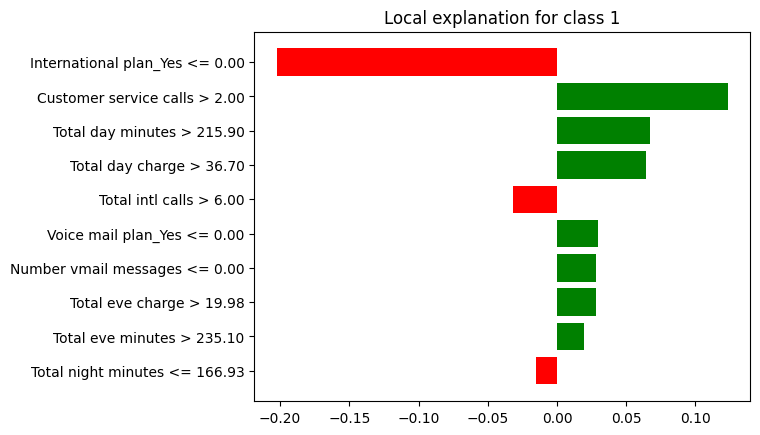

In [26]:
from lime.lime_tabular import LimeTabularExplainer
instance = X_test.iloc[2,:]
explainer = LimeTabularExplainer(
                                  X_train.values,
                                  feature_names= X_train.columns,
                                  mode = 'classification'
)

explained_class = explainer.explain_instance(instance.values,
                                             model_pipeline.predict_proba
                                             )
explained_class.as_pyplot_figure();

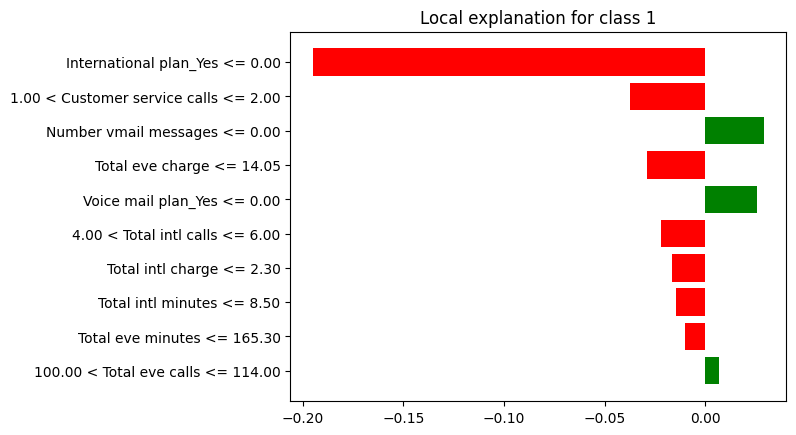

In [27]:
from lime.lime_tabular import LimeTabularExplainer
instance = X_test.iloc[3,:]
explainer = LimeTabularExplainer(
                                  X_train.values,
                                  feature_names= X_train.columns,
                                  mode = 'classification'
)

explained_class = explainer.explain_instance(instance.values,
                                             model_pipeline.predict_proba
                                             )
explained_class.as_pyplot_figure();

[<lime.explanation.Explanation object at 0x0000022C25CCA650>, <lime.explanation.Explanation object at 0x0000022C25D41010>, <lime.explanation.Explanation object at 0x0000022C25D5AAD0>, <lime.explanation.Explanation object at 0x0000022C25D5A250>]


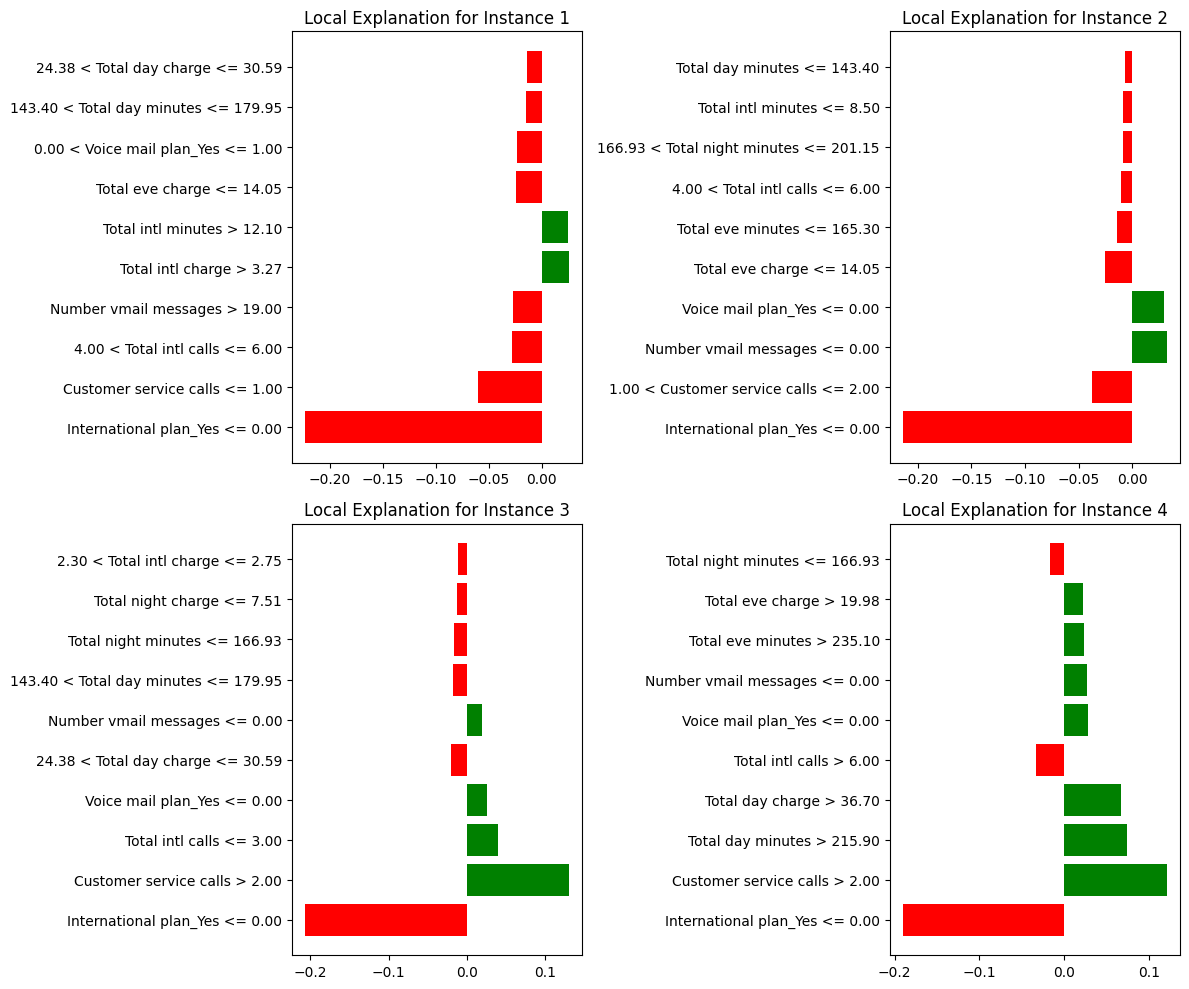

In [28]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(
                                  X_train.values,
                                  feature_names= X_train.columns,
                                  mode = 'classification'
)
Instances = {"Instance1" : X_test.iloc[5,:],
"Instance2" :X_test.iloc[3,:],
"Instance3" : X_test.iloc[7,:],
"Instance4" :X_test.iloc[2,:]}

explained_output = []
for name, instance in Instances.items():
    explained_class = explainer.explain_instance(
                                                  instance.values,
                                                  model_pipeline.predict_proba
    )
    explained_output.append(explained_class)
print(explained_output)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
for i, explanation in enumerate(explained_output):
    row, col = divmod(i, 2)
    feature_names, weights = zip(*explanation.as_list())
    colors = ['green' if w > 0 else 'red' for w in weights]
    ax[row, col].barh(feature_names, weights, color = colors)
    ax[row, col].set_title(f"Local Explanation for Instance {i+1}")

plt.tight_layout()
plt.show()